**Implementation of Random Forest Classification**





Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



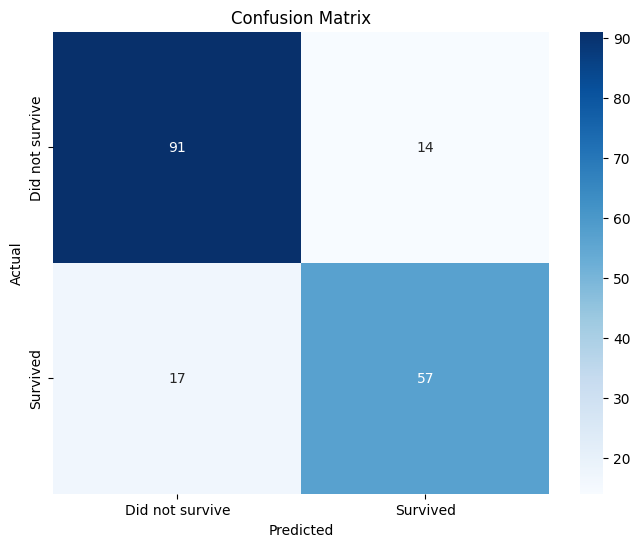

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Drop rows with missing target values
titanic_data = titanic_data.dropna(subset=['Survived'])

# Feature Engineering
# Create a new feature for Family Size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Extract titles from names
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Rare')
titanic_data['Title'] = titanic_data['Title'].replace('Mlle', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')

# Select relevant features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Embarked', 'Title']]
y = titanic_data['Survived']

# Convert categorical variables to numerical
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
X['Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
X['Title'] = X['Title'].map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Rare': 3})

# Handle missing values in 'Age' and 'Fare'
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)

# Normalize the 'Fare' feature
X['Fare'] = (X['Fare'] - X['Fare'].mean()) / X['Fare'].std()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did not survive', 'Survived'],
            yticklabels=['Did not survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


**EXAMPLE**
# **CUSTOMER SEGMENTATION**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Create a synthetic customer dataset
np.random.seed(42)
num_customers = 1000

data = {
    'Age': np.random.randint(18, 70, num_customers),
    'Gender': np.random.choice(['Male', 'Female'], num_customers),
    'Income': np.random.randint(20000, 120000, num_customers),
    'SpendingScore': np.random.randint(1, 100, num_customers),  # Score from 1 to 100
    'FamilySize': np.random.randint(1, 5, num_customers),
}

customer_data = pd.DataFrame(data)

In [4]:
# Create target variable (Customer Segment)
customer_data['Segment'] = pd.cut(customer_data['SpendingScore'], bins=[0, 33, 66, 100], labels=['Low', 'Medium', 'High'])

In [5]:
# Convert categorical variables to numerical
customer_data['Gender'] = customer_data['Gender'].map({'Male': 0, 'Female': 1})

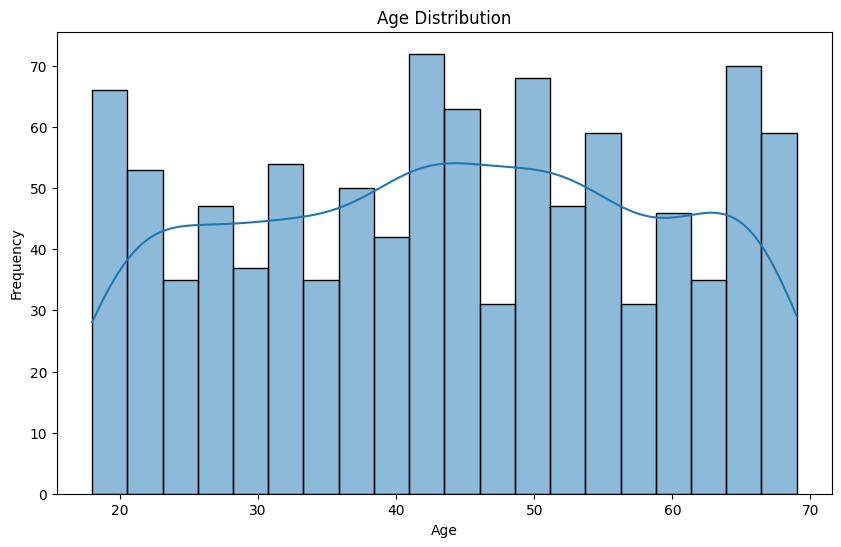

In [6]:
# EDA: Visualize distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

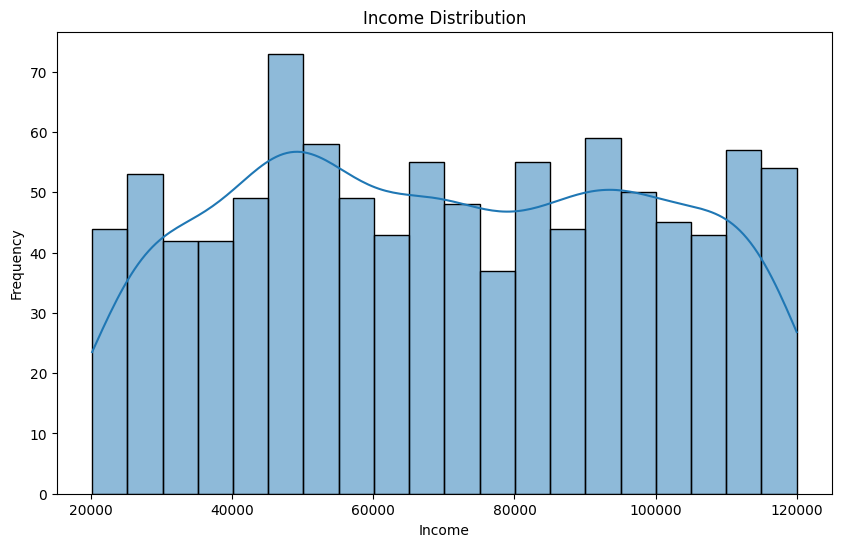

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

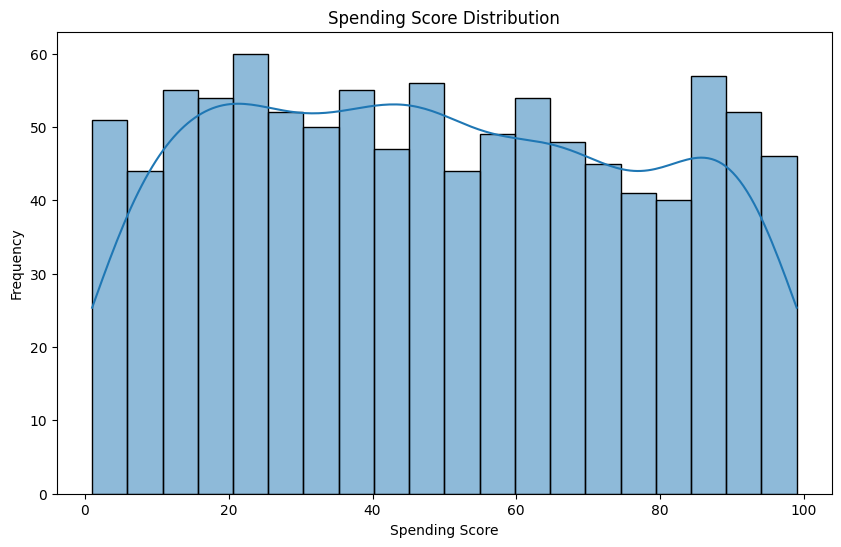

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['SpendingScore'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

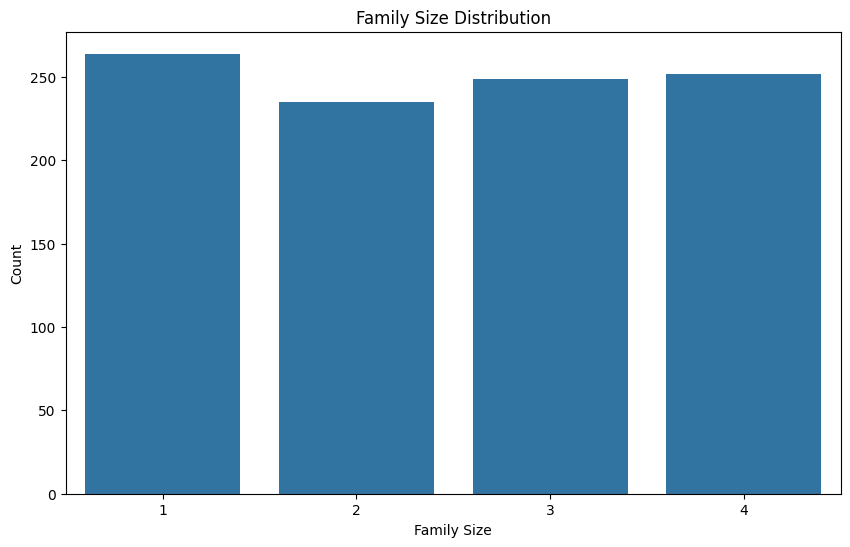

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='FamilySize')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

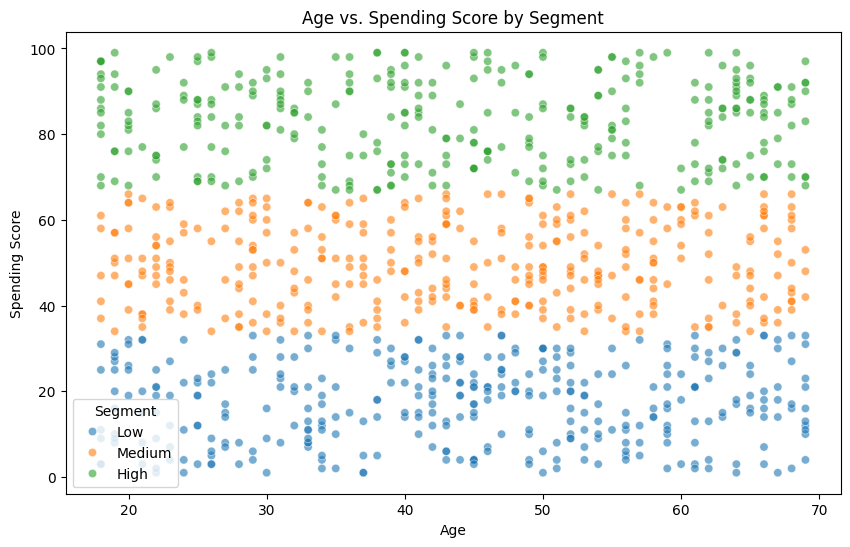

In [10]:
# EDA: Analyze the relationship between features and segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Age', y='SpendingScore', hue='Segment', alpha=0.6)
plt.title('Age vs. Spending Score by Segment')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

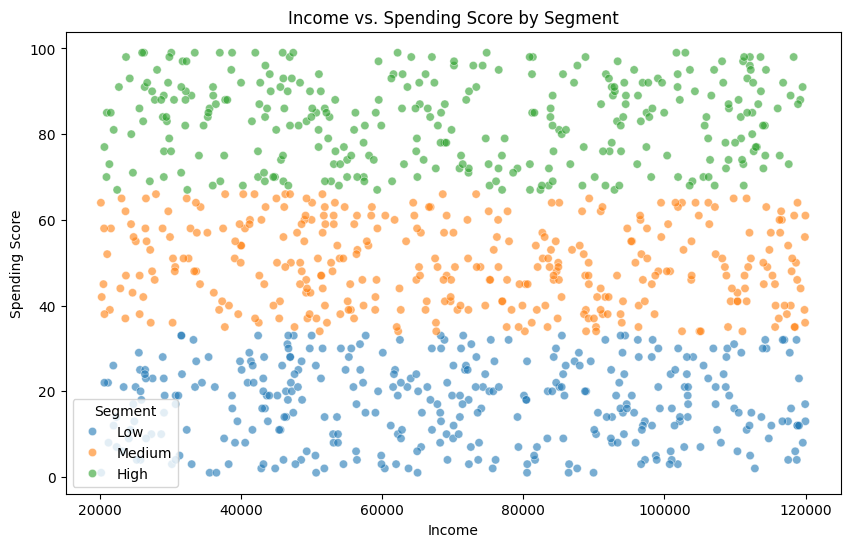

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Income', y='SpendingScore', hue='Segment', alpha=0.6)
plt.title('Income vs. Spending Score by Segment')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

In [12]:
# Select features and target variable
X = customer_data[['Age', 'Gender', 'Income', 'SpendingScore', 'FamilySize']]
y = customer_data['Segment']

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [18]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        63
         Low       1.00      1.00      1.00        67
      Medium       1.00      1.00      1.00        70

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



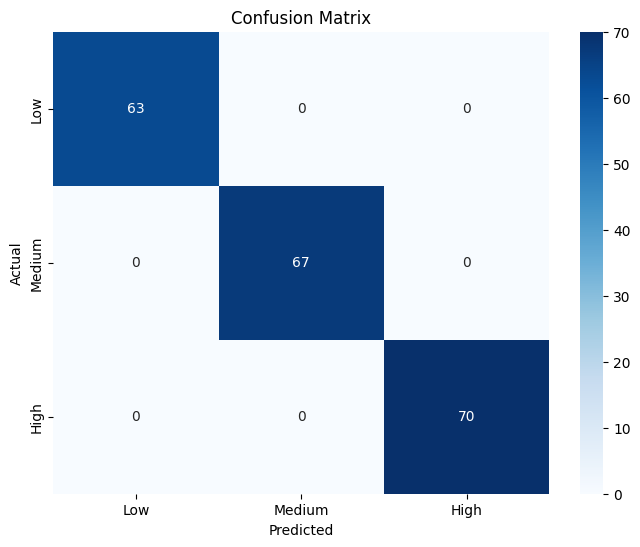

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

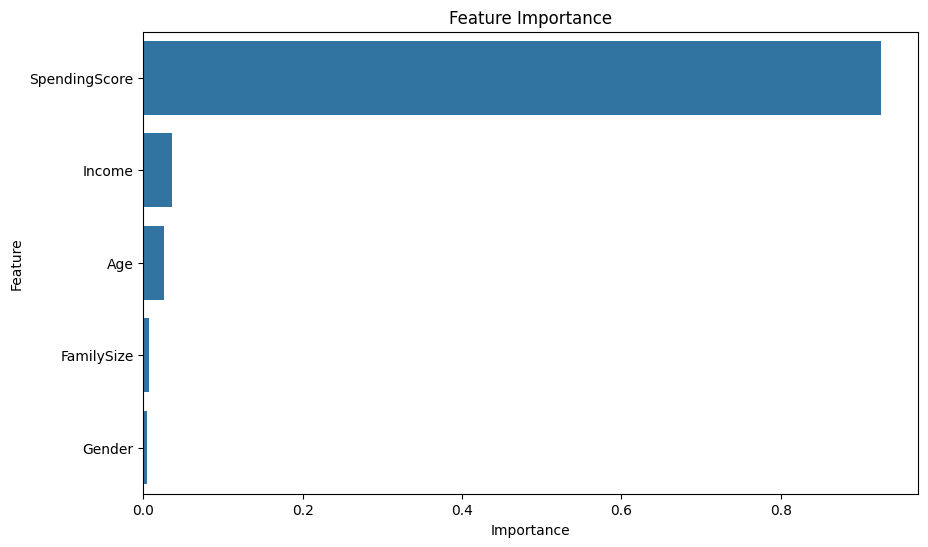

In [20]:
# Feature Importance
importance = rf_classifier.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()